In [1]:
#IMPORT LIBRARIES
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt
import geopy.distance
import csv
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import netCDF4 as nc

In [2]:
#COUNTRY SELECTION
simcountry = "ChTw" #"Jp","Kr","Ph","Vn"
area = simcountry

In [3]:
#SUBSETTING DF TO INCLUDE ONLY THAT ENTERED AREA AND TIME OF CONCERN

df_ = pd.read_csv("besttrack_data.csv")
df_s = df_
year_dum = []
for i in range(0,len(df_s)):
    if df_s["time_yy"].iat[i]>50:
         year_  = 1900 + int(df_s["time_yy"].iat[i])
    elif df_s["time_yy"].iat[i]<22:
        year_ = 2000 + int(df_s["time_yy"].iat[i])
    else:
        print("Weird Year")
    year_dum.append(year_)
df_s["year"] = year_dum

df_s = df_s[df_s["year"]>=1955]
df_s = df_s[df_s["year"]<=2015]
df_s = df_s[(df_s['time_hh']==0)|(df_s['time_hh']==6)|(df_s['time_hh']==12)|(df_s['time_hh']==18)]

#change for every country
if simcountry == "ChTw":
    df_s = df_s[(df_s["lon"]<=128.3)&(df_s["lon"]>=103.4)]
    df_s = df_s[(df_s["lat"]<=45.4)&(df_s["lat"]>=15.6)]
elif simcountry == "Jp":
    df_s = df_s[(df_s["lon"]<=152.0)&(df_s["lon"]>=124.0)]
    df_s = df_s[(df_s["lat"]<=50.0)&(df_s["lat"]>=21.0)]
elif simcountry == "Kr":
    df_s = df_s[(df_s["lon"]<=132.5)&(df_s["lon"]>=115.0)]
    df_s = df_s[(df_s["lat"]<=45.0)&(df_s["lat"]>=27.5)]
elif simcountry == "Ph":
    df_s = df_s[(df_s["lon"]<=135.0)&(df_s["lon"]>=115.0)]
    df_s = df_s[(df_s["lat"]<=25.0)&(df_s["lat"]>=5.0)]
elif simcountry == "Vn":
    df_s = df_s[(df_s["lon"]<=120.0)&(df_s["lon"]>=100.0)]
    df_s = df_s[(df_s["lat"]<=22.5)&(df_s["lat"]>=5.0)]
else:
    print("Wrong Country Code")
    
df_s = df_s.reset_index(drop=True)


In [4]:
#PUTTING TC LOCATIONS IN A DICTIONARY

SID_n = df_s["itl_id"].unique()
loc_dic = {}
lon_dic = {}
lat_dic = {}
press_dic = {}

for id in SID_n:
    loc_dic[id] = []
    lon_dic[id] = []
    lat_dic[id] = []
    press_dic[id] = []

for i in range(0,len(df_s)):
    sid = df_s["itl_id"].iat[i]
    lat = df_s["lat"].iat[i]
    lon = df_s["lon"].iat[i]
    press = df_s["min_press"].iat[i]

    loc_dic[sid].append([lon,lat]) #lon lat dictionary
    lon_dic[sid].append(lon) #lon dic
    lat_dic[sid].append(lat) #lat dic
    press_dic[sid].append(float(press))

#removal of TCs with less than 4 points

sid_remove_list = []
for sid in SID_n:
    if (len(loc_dic[sid])<=4):
        sid_remove_list.append(sid)
        
SID_n = [i for i in SID_n if i not in sid_remove_list]
len(SID_n)



809

In [5]:
#COUNTRY-SPECIFIC MASKS FOR RAINFALL
if simcountry == "ChTw":
    chtw_mask = np.array(np.loadtxt('ChTw_mask_.csv', delimiter=','))
    country_mask = np.flipud(chtw_mask)

elif simcountry == "Jp":
    jp_mask  = np.array(np.loadtxt('Jp_mask_.csv', delimiter=','))
    country_mask = np.flipud(jp_mask)

elif simcountry == "Kr":
    kr_mask  = np.array(np.loadtxt('Kr_mask_.csv', delimiter=','))
    country_mask = np.flipud(kr_mask)

elif simcountry == "Ph":
    ph_mask  = np.array(np.loadtxt('Ph_mask_.csv', delimiter=','))
    country_mask = np.flipud(ph_mask)

elif simcountry == "Vn":
    vn_mask  = np.array(np.loadtxt('Vn_mask_.csv', delimiter=','))
    country_mask = np.flipud(vn_mask)

else:
    print("Wrong Country Code")


In [6]:
#define observed, then removed tc with zero

ncfile='APHRO_MA_025deg_V1101_EXR1.2015.nc' #One APHRODITE file
lat_key='lat'
lon_key='lon'
dir_rain = 'rainfall_500/' #processed APHRODITE rainfal


ds=nc.Dataset(ncfile)
lat = ds.variables[lat_key][:]#[::-1]
lon = ds.variables[lon_key][:]    

data_true = np.zeros((len(SID_n),lat.shape[0],lon.shape[0]))
data_true_dic = {}
#data_true_masked = np.zeros((len(SID_n),lat.shape[0],lon.shape[0]))

sidt_cnt = 0
for sidt in SID_n:
    print(f"{sidt}")
    data_t =np.array(list(csv.reader(open(f'{dir_rain}{sidt}_rain_obs.csv')))).astype(float)
    data_true_dic[sidt] = data_t
    data_true[sidt_cnt] = data_t
    sidt_cnt = sidt_cnt + 1

ds.close()
#masking data_true for checking 0 values

data_true_ = np.multiply(country_mask, data_true)
valid_values = np.where(country_mask > 0)
for i in range(0,data_true.shape[0]):
    output_array = np.zeros_like(data_true[i])
    output_array[valid_values] = data_true_[i][valid_values]
    data_true[i] = output_array

5505
5506
5507
5512
5515
5516
5519
5521
5526
5603
5605
5606
5609
5610
5611
5612
5613
5614
5615
5618
5619
5621
5622
5703
5705
5706
5707
5708
5711
5714
5715
5718
5720
5804
5806
5808
5810
5812
5814
5816
5818
5819
5820
5824
5825
5826
5904
5905
5906
5908
5909
5911
5913
5914
5916
5917
5918
5920
5921
6001
6002
6003
6005
6006
6008
6009
6013
6015
6017
6019
6022
6023
6027
6103
6104
6105
6107
6108
6109
6110
6113
6116
6119
6120
6121
6122
6123
6125
6129
6203
6204
6205
6206
6209
6210
6211
6213
6216
6217
6218
6220
6221
6224
6227
6303
6304
6305
6307
6308
6310
6313
6314
6322
6323
6402
6403
6405
6407
6408
6409
6411
6412
6413
6414
6416
6417
6418
6419
6421
6422
6423
6424
6426
6433
6434
6506
6507
6508
6509
6510
6511
6512
6513
6515
6518
6519
6521
6522
6527
6531
6532
6601
6602
6603
6605
6606
6607
6608
6609
6612
6613
6615
6616
6617
6618
6621
6624
6630
6634
6704
6706
6707
6708
6710
6712
6716
6719
6720
6721
6723
6733
6734
6735
6737
6805
6806
6807
6808
6809
6812
6814
6816
6817
6904
6905
6906
6908
6909
6910
6911


In [7]:
#removing those with 0 rainfall
tclist_inc = []
#print(len(SID_n))
i = 0
for stc in SID_n:
    if data_true[i].sum()>0.0:
        tclist_inc.append(stc)
        #print(stc)
    i = i + 1    
#print(len(tclist_inc))
SID_n = tclist_inc
len(SID_n)

768

In [8]:
#TO MATCH NUMBER OF TCs WITH FCM, NUMBER TCs SHOULD BE DIVISIBLE BY 3
'''
#removing 1 tc for SID_n to be divisible to 3
import random
random.seed(0)
sid_remove_list = [(random.choice(SID_n))]
SID_n = [i for i in SID_n if i not in sid_remove_list]
'''

#grouping by 3 to
SID_n_2d = np.array(SID_n).reshape(-1,3)

In [9]:
#FUNCTIONS FOR FUZZY C-MEANS

#INITIALIZE MEMBERSHIP WEIGHTS
def initializeMembershipWeights(k,X):
  random.seed(0)
  weight = np.random.dirichlet(np.ones(k),len(X))
  weight_arr = np.array(weight)
  return weight_arr

#UPDATING MEMBERSHIP WEIGHTS (FCM)
def updateWeights(k,X,weight_arr,C,m_):
  #print(C)
  denom = np.zeros(len(X),dtype=np.float32)
  for i in range(k): #k is no. of clusters
    dist = (X - C[i])**2 #distance^2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    denom  = denom + np.power(1/dist,1/(m_-1))

  for i in range(k):
    dist = (X - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    weight_arr[:,i] = np.divide(np.power(1/dist,1/(m_-1)),denom)
  return weight_arr
    
#FUZZY ALGORITHM
def FuzzyMeansAlgorithm(X,C,k,m_):
  weight_arr = initializeMembershipWeights(k,X)
  #plt.figure(figsize=(50,50)) 
  for z in range(0,MAX_ITERS):
    #since we are not updating centroid, the next line is commented out 
    #C = computeCentroids(weight_arr)
    updateWeights(k,X,weight_arr,C,m_)
    #plotData(z,C)
  #plt.show()
  return (weight_arr,C)

#check size 
def medlength(dlist):
    siz_n = []
    for sid in dlist:
        #print(sid)
        siz = len(lat_dic[sid])
        siz_n.append(siz)
    siz_n = np.array(siz_n)
    return int(np.median(siz_n))


In [10]:
#FUNCTIONS FOR INTERPOLATION OF TRACKS

#function for computing distance between 2 points
def comp_dist(pt1,pt2):
    dist = (pt2[0]-pt1[0])**2+(pt2[1]-pt1[1])**2
    dist = np.sqrt(dist)
    return dist

#function for computing length/distance of desired segment
def comp_edist(ary,m_seg):
    n = len(ary)
    ed = 0
    for i in range(0,n-1):
        ed = ed + (1/m_seg)*comp_dist(ary[i],ary[i+1])
    return ed

#function for computing summation of distance
def comp_sum_dist(ary): 
    dist = 0
    for i in range(0,len(ary)-1):
        dist = dist + comp_dist(ary[i],ary[i+1])
    return dist

#function for interpolating track to desired number of segments
def interp_track(ary,m_seg): 
    interp_ary = []
    edist = comp_edist(ary,m_seg)
    for j in range(0,m_seg+1):
        if (j==0):
            x_ = ary[j][0]
            y_ = ary[j][1]
        elif (j ==m_seg):
            x_ = ary[len(ary)-1][0]
            y_ = ary[len(ary)-1][1]
        else:
            c2 = (j)*edist
            for l in range(0,len(ary)):#n_pts):
                c1 = 0
                c3 = 0
                for l_1 in range(0,l):
                    if(l_1-1>=0):
                        c1 = c1 + comp_dist(ary[l_1-1],ary[l_1])
                for l_2 in range(0,l+1):
                    if(l_2-1>=0):
                        #print(ary[l_2-1])
                        c3 = c3 + comp_dist(ary[l_2-1],ary[l_2])
                
                if ((c1<=c2) and (c2<c3)):
                    break
                else:
                    if (l == len(ary)-1):
                        print(f"error, j:{j}")
            if((comp_dist(ary[l-1],ary[l]))>0):
                m1_x = (ary[l][0]-ary[l-1][0])/(comp_dist(ary[l-1],ary[l]))
                m1_y = (ary[l][1]-ary[l-1][1])/(comp_dist(ary[l-1],ary[l]))
            else: 
                m1_x = 0
                m1_y = 0
            m2_x = c2 - c1    
            m2_y = m2_x
            
            x_ = ary[l-1][0]+m1_x*m2_x
            y_ = ary[l-1][1]+m1_y*m2_y
        interp_ary.append([x_,y_])
    return interp_ary


In [11]:
#IMPLEMENTATION INTERPOLATION (REQUIRED FOR FCM)
m_seg = medlength(SID_n) - 1 
loc_interp = {}
data_2d = []
data_all = []
for sid in SID_n:
    #print(f"{sid}")
    loc_interp[sid] = interp_track(loc_dic[sid],m_seg)
    data_2d.append(loc_interp[sid])
    #print(data_3d)
data_2d = np.array(data_2d)
data_all = np.hstack((data_2d[:,:,0],data_2d[:,:,1]))

loc_interp = {}
sid_cnt = 0
for sid in SID_n:
    loc_interp[sid] = data_all[sid_cnt]
    sid_cnt = sid_cnt + 1
    

In [12]:
#FINDING SIMILAR TCs USING FCM

stc_dic = {}
#Assigning values to training and testing datasets
#from sklearn.model_selection import train_test_split
#SID_train, SID_test = train_test_split(SID_n, test_size=0.01, random_state=0)
for ii in range(0,SID_n_2d.shape[0]):
    print(f"{ii}")
    SID_test = SID_n_2d[ii]
    tcname_test = SID_test#["Utor (2001)","Nesat (2011)","Chan-hom (2015)","Goni (2015)"]
    SID_train = [i for i in SID_n if i not in SID_test]

    dtrain = dict((k, loc_interp[k]) for k in SID_train if k in loc_interp)
    dtest = dict((k, loc_interp[k]) for k in SID_test if k in loc_interp)

    atrain = []
    atest = []
    for sid in SID_train:
        atrain.append(dtrain[sid])
    for sid in SID_test:
        atest.append(dtest[sid])
    atrain = np.array(atrain)
    atrain_s = atrain
    atest = np.array(atest)
    atest_s = atest


    #PERFORMING FUZZY C MEANS ALGORITHM

    n = len (atrain_s)
    k = len(atest_s) #number of clusters
    #dimension of cluster
    m_ = 2 # m parameter
    MAX_ITERS = 1 #number of iterations

    weight_fcm,cent_fcm = FuzzyMeansAlgorithm(atrain_s,atest_s,k,m_)
    weight = weight_fcm
    cent = cent_fcm

    df_dummy = pd.DataFrame(weight)
    
    
    #EXTRACTING S.I.D. (IBTRACS ID) OF TOP 100 FOR EACH TARGET TC
    k = len(atest_s)
    sid_100 = [[0]*100] #SIDs

    weight_100= np.zeros((k,100),dtype=np.float32)

    kk = 0

    for sidt in SID_test: 
    #for kk in range(0,weight.shape[1]):
        ind_100 = sorted(range(len(weight[:,kk])), key=lambda i: weight[:,kk][i])[-100:]
        #np.argpartition(weight[:,kk],-100)[-100:] #index of top 100
        ind_100 = np.flip(ind_100)
        weight_100[kk] = weight[ind_100,kk] #weight of top 100 
        #print(weight_100[kk])
        sid_100 = []
        ind_i = 0
        for ind in ind_100:
            #print(ind)
            sid_100.append(SID_train[ind])#SID of top 100
            ind_i = ind_i + 1
        stc_dic[sidt] = sid_100
        kk  = kk + 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


In [14]:
#COMPUTING RAINFALL PREDICTION
del(data_true)
data_pred = np.zeros((len(stc_dic),lat.shape[0],lon.shape[0]),dtype=np.float32)
data_pred_4d = np.zeros((len(stc_dic),100,lat.shape[0],lon.shape[0]),dtype=np.float32)
data_true = np.zeros((len(stc_dic),lat.shape[0],lon.shape[0]),dtype=np.float32)

sidt_cnt = 0
for sidt in stc_dic:
    print(f"{sidt}")
    data_true[sidt_cnt] = data_true_dic[sidt]
    data_stc = np.zeros((len(stc_dic[sidt]),lat.shape[0],lon.shape[0]))
    sid_cnt = 0
    for sid in stc_dic[sidt]:
        data_stc[sid_cnt] = data_true_dic[sid]
        data_pred_4d[sidt_cnt][sid_cnt] = data_true_dic[sid]
        sid_cnt = sid_cnt + 1
    data_pred[sidt_cnt] = np.average(data_stc,axis=0)
    del(data_stc)
    sidt_cnt = sidt_cnt + 1
    


5505
5506
5507
5512
5516
5519
5521
5526
5603
5605
5606
5609
5610
5611
5612
5613
5614
5615
5618
5703
5705
5706
5707
5708
5711
5714
5715
5718
5720
5804
5806
5808
5810
5812
5814
5816
5818
5819
5820
5824
5825
5904
5905
5906
5908
5909
5911
5913
5914
5916
5917
5918
5920
5921
6001
6003
6005
6006
6008
6009
6013
6015
6017
6019
6022
6023
6103
6104
6105
6107
6108
6109
6110
6113
6116
6119
6120
6121
6122
6123
6125
6203
6204
6205
6206
6209
6210
6211
6213
6216
6217
6218
6220
6221
6227
6303
6304
6305
6307
6308
6310
6313
6314
6322
6323
6402
6403
6405
6407
6408
6409
6411
6412
6413
6414
6416
6417
6418
6419
6421
6422
6423
6424
6426
6434
6507
6508
6509
6510
6511
6512
6513
6515
6518
6519
6521
6522
6527
6531
6601
6602
6603
6605
6606
6607
6608
6609
6612
6613
6615
6616
6617
6618
6621
6624
6630
6634
6704
6706
6707
6708
6710
6712
6716
6719
6720
6721
6723
6733
6734
6735
6737
6805
6806
6807
6808
6809
6812
6814
6816
6817
6904
6905
6906
6908
6909
6910
6911
6912
7001
7002
7004
7008
7011
7014
7015
7016
7018
7019
7020


In [15]:
#COMPUTING RAINFALL PREDICTION PERFORMANCE
from scipy.stats import pearsonr
import sklearn
import sklearn.metrics

mae_2d = np.zeros((len(stc_dic),100),dtype=np.float32)
rmse_2d = np.zeros((len(stc_dic),100),dtype=np.float32)
corr_2d = np.zeros((len(stc_dic),100),dtype=np.float32)

for i in range(0,len(stc_dic)):
    print(f"{i}") 
    for ii in range(0,100):
        obs = data_true[i]
        pred = np.average(data_pred_4d[i][0:ii+1],axis=0)

        valid_values = np.where(country_mask == 1)
        obs = obs[valid_values]
        pred = pred[valid_values]
        

        mae=sklearn.metrics.mean_absolute_error(obs, pred)
        mae_2d [i][ii] = mae   
        
        mse = sklearn.metrics.mean_squared_error(obs, pred)
        rmse = np.sqrt(np.mean(np.square(pred - obs)))
        rmse_2d [i][ii] = rmse 
        
        if np.all(obs == obs[0]) or np.all(pred == pred[0]):
            corr = 0.0
        else:
            corr, _ = pearsonr(obs.flatten(), pred.flatten())
        corr_2d [i][ii] = corr


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

12
min RMSE: 7.383599758148193


Text(0, 0.5, 'RMSE [mm])')

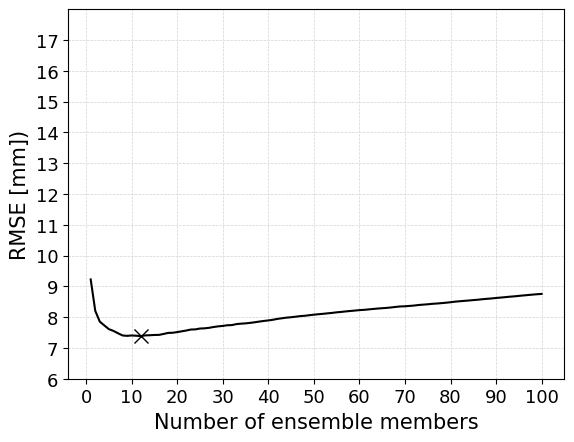

In [16]:
#PLOTTING RMSE FOR ALL TC CASES
rmse_2d[0]
plt.plot(range(1,101), np.average(rmse_2d,axis=0),color='black')
# Find the index of the lowest value
min_index = np.argmin(np.average(rmse_2d,axis=0))
print(f"{min_index+1}")
# Plot the data, setting a marker for the lowest value
plt.plot(min_index+1, np.average(rmse_2d,axis=0)[min_index], marker='x', color='black',markersize=10)
print(f"min RMSE: {np.average(rmse_2d,axis=0)[min_index]}")
#plt.plot(range(1,101), np.average(rmse_2d,axis=0),marker='o',markersize=2)
plt.xlabel('Number of ensemble members',fontsize=15)
plt.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0, 101, 10),fontsize=13)
plt.yticks(np.arange(6, 18, 1),fontsize=13)
plt.ylim(6.0,18.0)
plt.ylabel('RMSE [mm])',fontsize=15)


max corr: 0.7667357325553894
8


Text(0, 0.5, 'Pearson r')

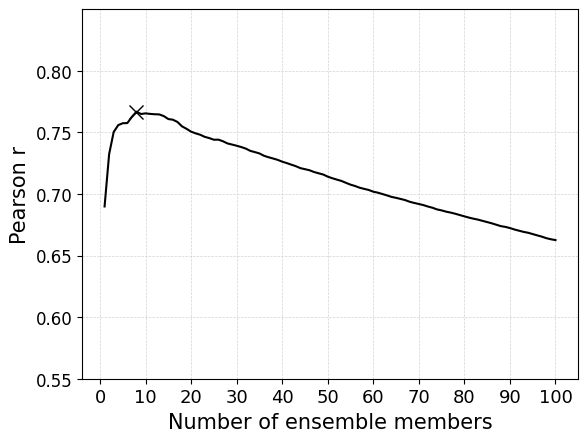

In [20]:
#PLOTTING CORRELATION COEFFICIENT FOR ALL TC CASES
plt.plot(range(1,101), np.average(corr_2d,axis=0),color='black')
# Find the index of the lowest value
max_index = np.argmax(np.average(corr_2d,axis=0))
# Plot the data, setting a marker for the lowest value
plt.plot(max_index+1, np.average(corr_2d,axis=0)[max_index], marker='x', color='black',markersize=10)
print(f"max corr: {np.average(corr_2d,axis=0)[max_index]}")
print(f"{max_index+1}")
#plt.plot(range(1,101), np.average(rmse_2d,axis=0),marker='o',markersize=2)
plt.xlabel('Number of ensemble members',fontsize=15)
plt.grid(color = 'lightgray', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0, 101, 10),fontsize=13)
plt.yticks(np.arange(0.55, 0.85, 0.05),fontsize=12)
plt.ylim(0.55,0.85)
plt.ylabel('Pearson r',fontsize=15)

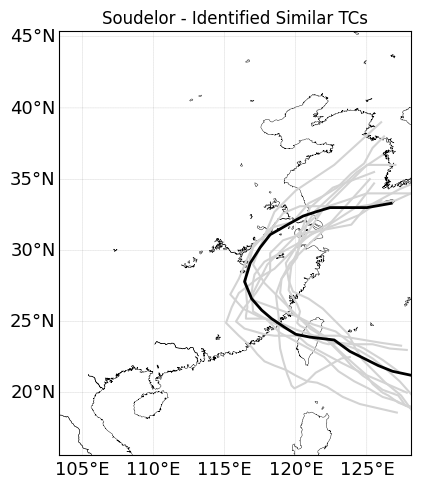

PREDICTION PERFORMANCE: 22.84mm RMSE, 0.82 corr


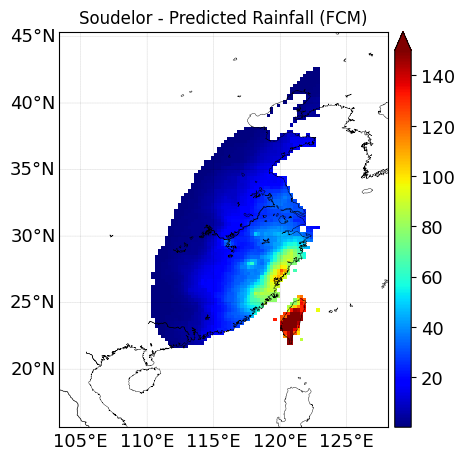

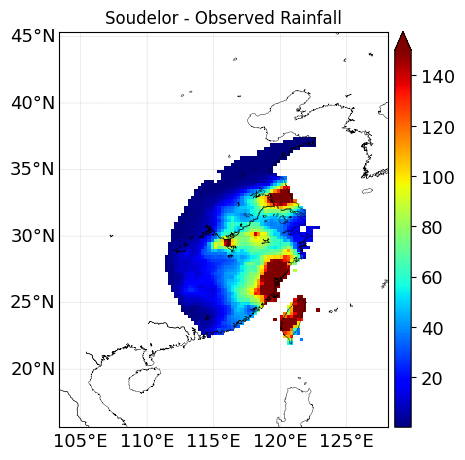

In [21]:
#PLOTTING RESULT FOR 1 TC CASE
maxx = min_index 

SID_test = [1513] #[1419,1216,1111,1321]
SID_test_name = ["Soudelor"] #["Vongfong","Sanba","Nanmadol","Wutip"]
tcname_test = SID_test_name


if(area=='ChTw'):
    lat_min=15.625
    lat_max=45.375
    lon_min=103.375
    lon_max=128.125 
if(area=='Jp'):
    lat_min=21.625
    lat_max=49.875
    lon_min=124.375
    lon_max=149.875   
if(area=='Kr'):
    lat_min=27.375
    lat_max=44.875
    lon_min=115.375
    lon_max=132.375
if(area=='Ph'):
    lat_min=5.125
    lat_max=24.875
    lon_min=115.125
    lon_max=134.875  
if(area=='Vn'):
    lat_min=5.125
    lat_max=22.375
    lon_min=100.125
    lon_max=119.875  
    
ds=nc.Dataset(ncfile)
lat = ds.variables[lat_key][:]#[::-1]
lon = ds.variables[lon_key][:]    
lat_min_indx=np.where(lat==lat_min)[0][0]
lat_max_indx=np.where(lat==lat_max)[0][0]
lon_min_indx=np.where(lon==lon_min)[0][0]
lon_max_indx=np.where(lon==lon_max)[0][0]

country_mask_t = country_mask[lat_min_indx:lat_max_indx+1,lon_min_indx:lon_max_indx+1]

i_sidt = 0
for sidt in SID_test:
    #DISPLAYING IDENTIFIED SIMILAR TCs
    cmap = mpl.colormaps['jet']
    cmap_ = cmap  
    cmap_.set_bad(color='white')

    fig = plt.figure (figsize = (10, 8))
    ax = fig.add_subplot(1,2,1)
    m = Basemap (ax = ax,projection='cyl',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i' )
    m.drawcoastlines (linewidth = 0.3)
    
    m.drawparallels(np.arange(-15,90,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)
    m.drawmeridians(np.arange(-180,180,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)

    lon_dum = []
    lat_dum = []
    for ii in range(0,len(loc_dic[sidt])):
        dum = (loc_dic[sidt][ii])
        lon_dum.append(dum[0])
        lat_dum.append(dum[1])
    m.plot(lon_dic[sidt],lat_dic[sidt],color="black",zorder=10,linewidth=2)

    for sid in stc_dic[sidt][:maxx]:
        
        lon_dum = []
        lat_dum = []
        for ii in range(0,len(loc_dic[sid])):
            dum = (loc_dic[sid][ii])
            lon_dum.append(dum[0])
            lat_dum.append(dum[1])
        m.plot(lon_dic[sid],lat_dic[sid],color="lightgray",zorder=2,linewidth=1.5)

    ax.set_title(f"{SID_test_name[i_sidt]} - Identified Similar TCs", fontsize = 12)
    plt.show()

    #CALCULATION OF RAINFALL, INCLUDING PERFORMANCE
    data_true_ = data_true_dic[sidt][lat_min_indx:lat_max_indx+1,lon_min_indx:lon_max_indx+1]
    
    data_stc = np.zeros((maxx,lat.shape[0],lon.shape[0]))
    sid_cnt=0
    for sid in stc_dic[sidt][:maxx]:
        #print(f"x.{sid}")
        data_stc[sid_cnt] = data_true_dic[sid]
        sid_cnt = sid_cnt + 1
    data_pred_dum = np.average(data_stc,axis=0)[lat_min_indx:lat_max_indx+1,lon_min_indx:lon_max_indx+1]
    
    data_pred_ = data_pred_dum
    
    valid_values = np.where(country_mask_t == 1)
    data_true_s = data_true_[valid_values]
    data_pred_s = data_pred_[valid_values]

    fig = plt.figure (figsize = (10, 8))

    rmse_t = np.sqrt(np.mean(np.square(data_pred_s - data_true_s)))
    mean_t = np.mean(data_true_s)
    std_t = np.std(data_true_s - data_pred_s)
    cov_t = std_t / mean_t

    corr_t, _ = pearsonr(data_true_s.flatten(), data_pred_s.flatten())

    print(f"PREDICTION PERFORMANCE: {rmse_t:.2f}mm RMSE, {corr_t:.2f} corr")

    data_true_ = np.multiply(country_mask_t, data_true_)
    data_pred_ = np.multiply(country_mask_t, data_pred_dum)
    
    data_true_ = np.ma.masked_where(data_true_<=0.0001,data_true_)
    data_pred_ = np.ma.masked_where(data_pred_<=0.0001,data_pred_)

    #DISPLAY PREDICTED RAINFALL
    vmin_ = 0.1
    vmax_ = 150.0
    ax = fig.add_subplot(1,2,1)

    cmap = mpl.colormaps['jet']
    cmap_ = cmap 

    cmap_.set_bad(color='white')
    m = Basemap (ax = ax,projection='cyl',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i' )
    m.drawcoastlines (linewidth = 0.3)

    m.drawparallels(np.arange(-15,90,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)
    m.drawmeridians(np.arange(-180,180,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)

    img = m.imshow (data_pred_, cmap = cmap_, interpolation = 'nearest',vmin=vmin_, vmax=vmax_)

    cbar = m.colorbar(img, location='right',ax=ax, extend='max')
    cbar.ax.tick_params(labelsize=13)
    cbar.ax.locator_params(nbins=10)

    ax.set_title(f"{SID_test_name[i_sidt]} - Predicted Rainfall (FCM)", fontsize = 12)
    plt.show()

    #DISPLAY OBSERVED RAINFALL
    fig = plt.figure (figsize = (10, 8))
    ax = fig.add_subplot(1,2,1)

    cmap = mpl.colormaps['jet']
    cmap_ = cmap  
    cmap_.set_bad(color='white')
    m = Basemap (ax = ax,projection='cyl',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i' )
    m.drawcoastlines (linewidth = 0.3)

    m.drawparallels(np.arange(-15,90,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)
    m.drawmeridians(np.arange(-180,180,5),labels=[1,0,0,1],fontsize=13,linewidth=0.1)

    img = m.imshow (data_true_, cmap = cmap_, interpolation = 'nearest',vmin=vmin_, vmax=vmax_)
    ax.set_title(f"{SID_test_name[i_sidt]} - Observed Rainfall", fontsize = 12)
    cbar = m.colorbar(img, location='right',ax=ax, extend='max')
    cbar.ax.tick_params(labelsize=13)
    plt.show()

    i_sidt = i_sidt + 1
